In [21]:
%%bash
source ~/tt-menv/bin/activate
python ./compare_confs.py > 0

2024-12-18 16:50:13.887 | DEBUG    | ttnn:<module>:82 - Initial ttnn.CONFIG:
Config{cache_path=/home/bach/.cache/ttnn,model_cache_path=/home/bach/.cache/ttnn/models,tmp_dir=/tmp/ttnn,enable_model_cache=false,enable_fast_runtime_mode=true,throw_exception_on_fallback=false,enable_logging=false,enable_graph_report=false,enable_detailed_buffer_report=false,enable_detailed_tensor_report=false,enable_comparison_mode=false,comparison_mode_pcc=0.9999,root_report_path=generated/ttnn/reports,report_name=std::nullopt,std::nullopt}
2024-12-18 16:50:13.942 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.pearson_correlation_coefficient be migrated to C++?
2024-12-18 16:50:13.943 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.Conv1d be migrated to C++?
2024-12-18 16:50:13.943 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.conv2d be migrated to C++?
2024-12-18 16:50:13.943 | WARNING  | ttnn.decorators:operation_decorator:801 - Should ttnn.unsq

In [27]:
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

df = pd.DataFrame.from_records(json.load(open("./results_compare.json", "r")))
df

,bshard_HiFi_f32,bshard_LoFi_f32,mat_sizes,progcache_bf16,progcache_f32
0,0.666219,0.603444,2,0.328267,0.337960
1,0.015327,0.038306,4,0.002611,0.002277
2,0.017441,0.016707,8,0.002328,0.002424
3,0.016940,0.016171,16,0.002619,0.002511
4,0.018455,0.018419,32,0.002245,0.002321
5,0.665698,0.598033,64,0.571006,0.375266
6,0.666275,0.618456,128,0.572263,0.779689
7,0.712800,0.601315,256,0.565938,0.557674
8,0.978258,0.622301,512,0.584186,0.572663
9,1.274658,0.623137,1024,NaN,0.407066


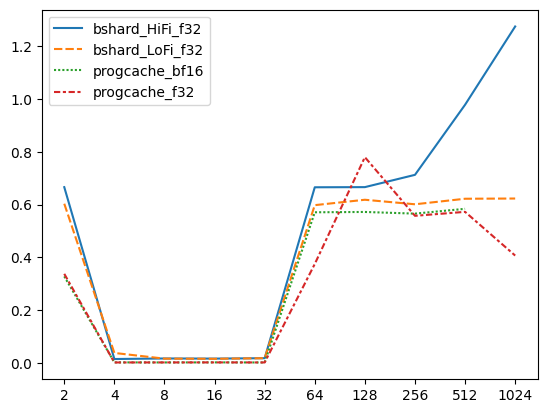

In [28]:
mat_size = list(df.pop("mat_sizes"))
fig, ax = plt.subplots()
plot = sns.lineplot(df, ax=ax)
ax.set_xticks(range(0, len(mat_size)))
ax.set_xticklabels(mat_size)
plt.show()